<a href="https://colab.research.google.com/github/SaintSeong/SpartaCoding_AI/blob/main/%EC%8B%AC%ED%99%94_%EA%B3%BC%EC%A0%9C(Plot1%2C_Plot2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 로드 및 전처리


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from matplotlib import pyplot as plt
import numpy as np


# CIFAR10 데이터셋 로드

In [2]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


# 데이터 로더 생성

In [3]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

# 데이터 Shape 확인




In [4]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([256, 3, 32, 32]) torch.Size([256])


# 모델 정의

In [5]:
device = "cuda"

class Model_LeakyReLU(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


class Model_Sigmoid(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

model_LeakyReLU_SGD = Model_LeakyReLU(32*32*3, 1024)
model_LeakyReLU_Adam = Model_LeakyReLU(32*32*3, 1024)
model_Sigmoid_Adam = Model_Sigmoid(32*32*3, 1024)


# 모델, 옵티마이저 설정

In [6]:
from torch.optim import SGD
from torch.optim import Adam

lr_SGD = 0.001
lr_Adam = 0.001

model_LeakyReLU_SGD = model_LeakyReLU_SGD.to(device)
model_LeakyReLU_Adam = model_LeakyReLU_Adam.to(device)
model_Sigmoid_Adam = model_Sigmoid_Adam.to(device)

optimizer_LeakyReLU_SGD = SGD(model_LeakyReLU_SGD.parameters(), lr=lr_SGD)
optimizer_LeakyReLU_Adam = Adam(model_LeakyReLU_Adam.parameters(), lr=lr_Adam)
optimizer_Sigmoid_Adam = Adam(model_Sigmoid_Adam.parameters(), lr=lr_Adam)

# 정확도 및 플롯 함수 정의

In [7]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

n_epochs = 50
train_SGD_LeakyReLu = [];
train_Adam_LeakyReLu = [];
train_Adam_Sigmoid = [];

# 모델 학습 1


1.   최적화 SGD 설정
2.   활성화 함수 LeakyReLU



In [8]:
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model_LeakyReLU_SGD.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model_LeakyReLU_SGD(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_LeakyReLU_SGD.step()

    total_loss += loss.item()

  train_SGD_LeakyReLu.append(accuracy(model_LeakyReLU_SGD, trainloader))
  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 450.4148635864258
Epoch   1 | Loss: 449.32351779937744
Epoch   2 | Loss: 448.39859414100647
Epoch   3 | Loss: 447.5081272125244
Epoch   4 | Loss: 446.6347875595093
Epoch   5 | Loss: 445.7816333770752
Epoch   6 | Loss: 444.92031264305115
Epoch   7 | Loss: 444.0443296432495
Epoch   8 | Loss: 443.14439702033997
Epoch   9 | Loss: 442.09430289268494
Epoch  10 | Loss: 441.02738094329834
Epoch  11 | Loss: 440.03112149238586
Epoch  12 | Loss: 438.9798710346222
Epoch  13 | Loss: 437.9283378124237
Epoch  14 | Loss: 436.8959255218506
Epoch  15 | Loss: 435.9270191192627
Epoch  16 | Loss: 434.92262744903564
Epoch  17 | Loss: 433.9040813446045
Epoch  18 | Loss: 432.9662871360779
Epoch  19 | Loss: 431.9937815666199
Epoch  20 | Loss: 431.172025680542
Epoch  21 | Loss: 430.08217883110046
Epoch  22 | Loss: 428.7480492591858
Epoch  23 | Loss: 427.5153183937073
Epoch  24 | Loss: 426.31944394111633
Epoch  25 | Loss: 425.20845556259155
Epoch  26 | Loss: 424.1173198223114
Epoch  27 | Loss: 

# 모델 학습 2


1.   최적화 Adam 설정
2.   활성화 함수 LeakyReLU


In [9]:
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model_LeakyReLU_Adam.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model_LeakyReLU_Adam(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_LeakyReLU_Adam.step()

    total_loss += loss.item()

  train_Adam_LeakyReLu.append(accuracy(model_LeakyReLU_Adam, trainloader))
  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 430.59201669692993
Epoch   1 | Loss: 393.55972933769226
Epoch   2 | Loss: 368.8481605052948
Epoch   3 | Loss: 353.306920170784
Epoch   4 | Loss: 340.21712613105774
Epoch   5 | Loss: 331.3296465873718
Epoch   6 | Loss: 323.49344170093536
Epoch   7 | Loss: 314.4192018508911
Epoch   8 | Loss: 307.79444003105164
Epoch   9 | Loss: 302.01398622989655
Epoch  10 | Loss: 295.1928857564926
Epoch  11 | Loss: 288.70967745780945
Epoch  12 | Loss: 285.8308457136154
Epoch  13 | Loss: 281.6938395500183
Epoch  14 | Loss: 276.34783613681793
Epoch  15 | Loss: 274.3481240272522
Epoch  16 | Loss: 272.27456843852997
Epoch  17 | Loss: 265.8513354063034
Epoch  18 | Loss: 263.8471260070801
Epoch  19 | Loss: 260.4369161128998
Epoch  20 | Loss: 258.1817299127579
Epoch  21 | Loss: 254.58441066741943
Epoch  22 | Loss: 250.2617279291153
Epoch  23 | Loss: 248.5666561126709
Epoch  24 | Loss: 243.19611132144928
Epoch  25 | Loss: 244.38280642032623
Epoch  26 | Loss: 238.4340980052948
Epoch  27 | Loss:

# 모델 학습 3


1.   최적화 Adam 설정
2.   활성화 함수 Sigmoid

In [10]:
for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model_Sigmoid_Adam.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model_Sigmoid_Adam(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer_Sigmoid_Adam.step()

    total_loss += loss.item()

  train_Adam_Sigmoid.append(accuracy(model_Sigmoid_Adam, trainloader))
  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 410.7406014204025
Epoch   1 | Loss: 393.8928476572037
Epoch   2 | Loss: 386.99909567832947
Epoch   3 | Loss: 384.4489735364914
Epoch   4 | Loss: 380.87555611133575
Epoch   5 | Loss: 378.934556722641
Epoch   6 | Loss: 377.65600752830505
Epoch   7 | Loss: 375.71994030475616
Epoch   8 | Loss: 373.9109808206558
Epoch   9 | Loss: 373.61907935142517
Epoch  10 | Loss: 371.3869169950485
Epoch  11 | Loss: 370.1526333093643
Epoch  12 | Loss: 369.7192565202713
Epoch  13 | Loss: 368.63726782798767
Epoch  14 | Loss: 368.49223732948303
Epoch  15 | Loss: 367.8740086555481
Epoch  16 | Loss: 367.0439759492874
Epoch  17 | Loss: 365.7156950235367
Epoch  18 | Loss: 365.0009962320328
Epoch  19 | Loss: 364.07473480701447
Epoch  20 | Loss: 363.0055857896805
Epoch  21 | Loss: 362.5614753961563
Epoch  22 | Loss: 362.79990804195404
Epoch  23 | Loss: 361.60567033290863
Epoch  24 | Loss: 361.62555968761444
Epoch  25 | Loss: 360.6154987812042
Epoch  26 | Loss: 360.12871992588043
Epoch  27 | Loss:

# 정확도 Plot 보여주기

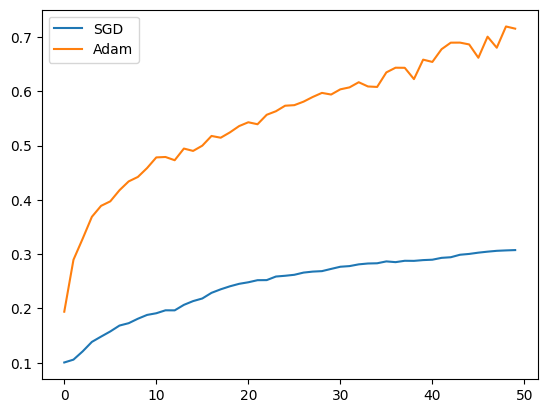

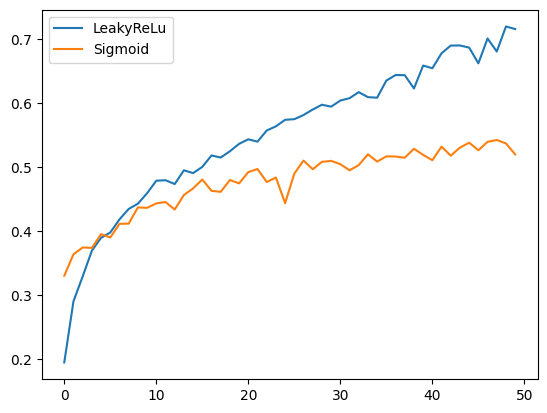

In [12]:
plot_acc(train_SGD_LeakyReLu, train_Adam_LeakyReLu, label1='SGD', label2='Adam')
plot_acc(train_Adam_LeakyReLu, train_Adam_Sigmoid, label1='LeakyReLu', label2='Sigmoid')